# Assignment 1
**Course:** ENSF 619.26, Lec 06

**Due Date:** 2023-09-12

### Step 1: Environment Setup
Install the `requirements.txt` file with `pip install -r ./requirements.txt`

### Step 2: Data Preparation
D2L dataset "IrisSpecies" is downloaded into this repo.

In [52]:
# libraries required
import pandas as pd
import polars as pl
import numpy as np
import os
import itertools
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Step 3: Data Exploration

In [53]:
df = pd.read_csv(os.path.join('IrisSpecies', 'Iris.csv'))
print(f"Read {df.shape[0]} rows and {df.shape[1]} columns")
df.sample(n=10)

Read 150 rows and 6 columns


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
78,79,6.0,2.9,4.5,1.5,Iris-versicolor
21,22,5.1,3.7,1.5,0.4,Iris-setosa
140,141,6.7,3.1,5.6,2.4,Iris-virginica
24,25,4.8,3.4,1.9,0.2,Iris-setosa
103,104,6.3,2.9,5.6,1.8,Iris-virginica
22,23,4.6,3.6,1.0,0.2,Iris-setosa
57,58,4.9,2.4,3.3,1.0,Iris-versicolor
87,88,6.3,2.3,4.4,1.3,Iris-versicolor
106,107,4.9,2.5,4.5,1.7,Iris-virginica


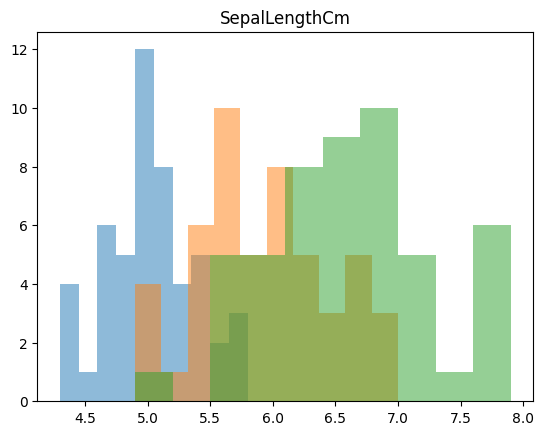

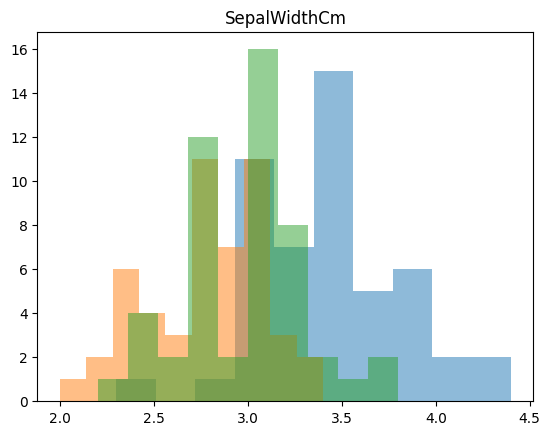

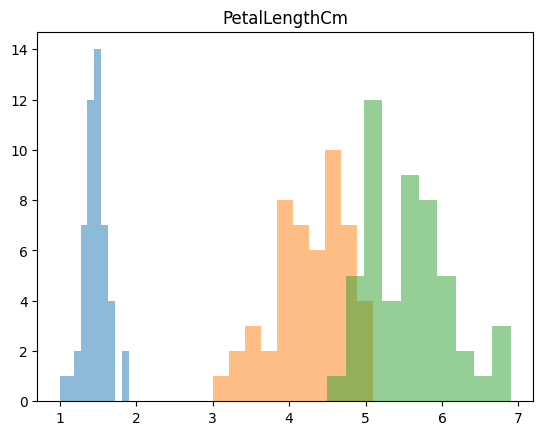

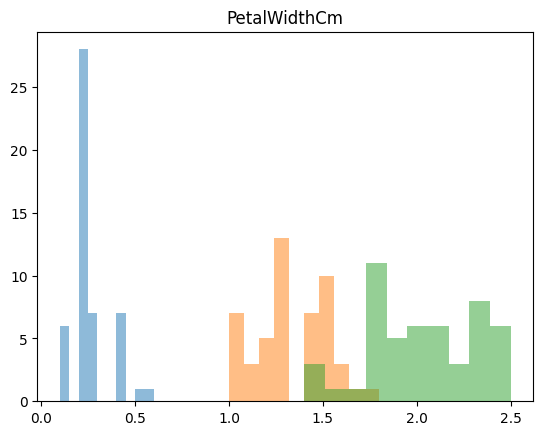

In [54]:
# frequences of species
df['Species'].value_counts()

# histogram of each col
num_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
for col in num_cols:
	# histogram, stacked by Species
	plt.hist(df[df['Species'] == 'Iris-setosa'][col], label='Iris-setosa', alpha=0.5)
	plt.hist(df[df['Species'] == 'Iris-versicolor'][col], label='Iris-versicolor', alpha=0.5)
	plt.hist(df[df['Species'] == 'Iris-virginica'][col], label='Iris-virginica', alpha=0.5)
	plt.title(col)
	plt.show()

In [55]:
# make a table of common statistics
df.drop(columns=['Id']).describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


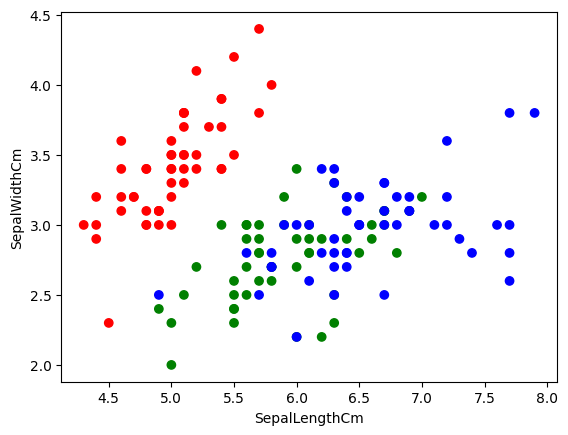

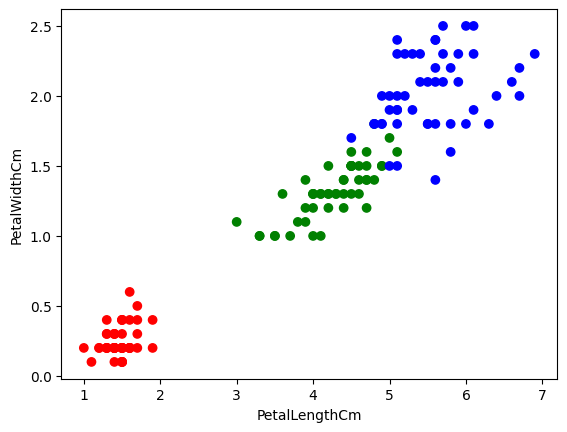

In [56]:
# make a scatter plot
color_map = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], c=df['Species'].map(color_map))
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.show()

# make another scatter plot
plt.scatter(df['PetalLengthCm'], df['PetalWidthCm'], c=df['Species'].map(color_map))
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.show()

### Step 4: Data Preprocessing

In [57]:
df_train = df.sample(frac=0.8, random_state=11031)
df_validate = df.drop(df_train.index)

# this is a very clean dataset, so no need to do any additional cleaning

### Step 5: Model Building

In [58]:
# model: use k-means clustering to guess the species of flower
k_cluster_count = df['Species'].nunique()
knn_mod = KNeighborsClassifier(n_neighbors=k_cluster_count)

### Step 6: Model Training

In [59]:
knn_mod.fit(
	df_train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']],
	df_train['Species']
)

# print out the basic model params
knn_mod

KNeighborsClassifier(n_neighbors=3)

### Step 7: Model Evaluation

In [60]:
# make predictions based on the model
y_pred = knn_mod.predict(df_validate[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])

# assess the accuracy
acc_store = accuracy_score(df_validate['Species'], y_pred)
print(f"Accuracy:\n{acc_store:.4f}")
print('-'*60)

# create a confusion matrix
conf_matr = confusion_matrix(df_validate['Species'], y_pred)
print(f"Confusion Matrix:\n{conf_matr}")
print('-'*60)

# create a classification report
class_report = classification_report(df_validate['Species'], y_pred)
print(f"Classification Report:\n{class_report}")

Accuracy:
0.9667
------------------------------------------------------------
Confusion Matrix:
[[ 6  0  0]
 [ 0 11  1]
 [ 0  0 12]]
------------------------------------------------------------
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         6
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



### Step 8: Hyperparameter Tuning (optional)
Three hyperparameters will be tuned:
1. Algorithm
2. Leaf Size
3. Weighting Options

These options will be stuffed into a dataframe, and the accuracy score will be calculated for each option, using the same training set.

Note that this method, while somewhat effective, has limitations as a result of only using the accuracy score as a success metric (and thus discarding the also-important confusion matrix and classification report).

In [61]:
# define the options for each hyperparameter
algorithm_options = ['ball_tree', 'auto', 'kd_tree'] # 'brute' fails
leaf_size_options = [10, 20, 30, 40, 50, 1000]
weighting_options = ['uniform', 'distance']
metric_options = ['euclidean', 'manhattan', 'chebyshev']
p_options = [1, 2]

# create cartesian product of options
options = list(itertools.product(algorithm_options, leaf_size_options, weighting_options, metric_options, p_options))

df_scores = pd.DataFrame(options, columns=['algorithm', 'leaf_size', 'weighting', 'metric', 'p'])

# iterate over the df, fit the model, and assess the accuracy
def get_eval_scores_by_running_model_with_hyperparams(row_hyperparam_spec: pd.Series) -> dict:
	
	knn_model = KNeighborsClassifier(
		n_neighbors=k_cluster_count,
		algorithm=row_hyperparam_spec['algorithm'],
		leaf_size=row_hyperparam_spec['leaf_size'],
		weights=row_hyperparam_spec['weighting'],
		metric=row_hyperparam_spec['metric'],
		p=row_hyperparam_spec['p'],
	)
	knn_model.fit(df_train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']], df_train['Species'])
	y_pred = knn_model.predict(df_validate[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])
	
	return {
		'accuracy_score': accuracy_score(df_validate['Species'], y_pred),
		'confusion_matrix': str(confusion_matrix(df_validate['Species'], y_pred)),
		'classification_report': str(classification_report(df_validate['Species'], y_pred)),
	}

df_scores[['accuracy_score', 'confusion_matrix', 'classification_report']] = df_scores.apply(
	lambda r: pd.Series(get_eval_scores_by_running_model_with_hyperparams(r)),
	axis=1
)
df_scores = df_scores.sort_values(by='accuracy_score', ascending=False, kind='stable') # best score at top

# print the results
print(f"Unique accuracy_scores: {df_scores['accuracy_score'].nunique()}")
print(f"Unique confusion_matrices: {df_scores['confusion_matrix'].astype(str).nunique()}")
print(f"Unique classification_reports: {df_scores['classification_report'].nunique()}")
print('-'*60)
print(df_scores.drop(columns=['confusion_matrix', 'classification_report']))


Unique accuracy_scores: 1
Unique confusion_matrices: 1
Unique classification_reports: 1
------------------------------------------------------------
     algorithm  leaf_size weighting     metric  p  accuracy_score
0    ball_tree         10   uniform  euclidean  1        0.966667
1    ball_tree         10   uniform  euclidean  2        0.966667
2    ball_tree         10   uniform  manhattan  1        0.966667
3    ball_tree         10   uniform  manhattan  2        0.966667
4    ball_tree         10   uniform  chebyshev  1        0.966667
..         ...        ...       ...        ... ..             ...
211    kd_tree       1000  distance  euclidean  2        0.966667
212    kd_tree       1000  distance  manhattan  1        0.966667
213    kd_tree       1000  distance  manhattan  2        0.966667
214    kd_tree       1000  distance  chebyshev  1        0.966667
215    kd_tree       1000  distance  chebyshev  2        0.966667

[216 rows x 6 columns]


The hyperparameter tuning was ineffective, as the only accuracy score was 0.967. The hyperparameter combinations assessed made no difference to the accuracy score, nor to the confusion matrix nor the classification report. This is a very strange result; the small dataset and small sample size are not well-suited for hyperparameter tuning.

### Step 9: Documentation

* Comments are provided at each step.
* These comments are beyond industry-standard documentation requirements.
* The code itself is quite self-documenting, so large volumes of extra comments aren't reallyyy required.



### Step 10: Submission

* Instead of a "Python code file", this Jupyter notebook is submitted as a PDF file.

#### Summary of Findings:
A K-Nearest Neighbors model was used to classify flower species based on petal length and width. The model had an accuracy score of 0.967. This trivial implementation served as a baseline of seting up a Python execution environment, installing and importing the required libraries, and creating a K-Nearest Neighbors model.

While an ineffective hyperparameter tuning implementation is shown, the hyperparameters made no effect on the accuracy score, and thus the results are void.
